# Chapter 

Course repo: https://github.com/mikexcohen/LinAlg4DataScience/tree/main

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# Make outputs show up to 4 decimals
np.set_printoptions(suppress=True, precision=4)

# for null spaces
import scipy.linalg

# a pretty-looking matrix from scipy
from scipy.linalg import toeplitz



## Visualizing matrices as images

Matrix A
[[ 1.1332 -1.4587  0.8384 -0.4678]
 [ 0.0584 -0.1529  1.1772 -1.4689]
 [ 0.2374  0.3293  0.9753  0.5932]]
Matrix C
[[ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]
 [-1  0 -1 -2 -3 -4 -5 -6 -7 -8]
 [-2 -1  0 -1 -2 -3 -4 -5 -6 -7]
 [-3 -2 -1  0 -1 -2 -3 -4 -5 -6]
 [-4 -3 -2 -1  0 -1 -2 -3 -4 -5]
 [-5 -4 -3 -2 -1  0 -1 -2 -3 -4]
 [-6 -5 -4 -3 -2 -1  0 -1 -2 -3]
 [-7 -6 -5 -4 -3 -2 -1  0 -1 -2]]


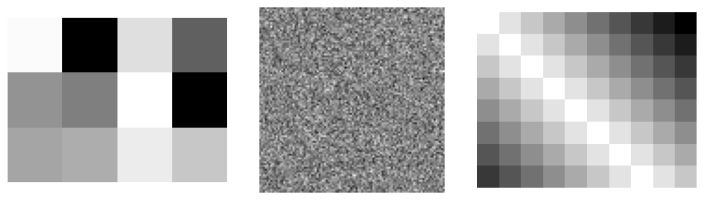

In [7]:
# create some matrices
A = np.random.randn(3,4)
B = np.random.randn(100,100)
C = -toeplitz(np.arange(8),np.arange(10))

print('Matrix A')
print(A)

print('Matrix C')
print(C)


# and show them as images
fig,axs = plt.subplots(1,3,figsize=(10,3))

axs[0].imshow(A,cmap='gray')
axs[1].imshow(B,cmap='gray')
axs[2].imshow(C,cmap='gray')

for i in range(3): axs[i].axis('off')
plt.tight_layout()
plt.savefig('Figure_05_01.png',dpi=300)
plt.show()

## Slicing and extracting portions of a matrix

In [18]:
# Create a matrix with numbers from 0 to 60 and place them in a 6x10 matrix
A = np.arange(60).reshape(6,10)

# Grab rows: 1-3 (zero basd index) with a step of 1
# Grab columns 0 - 4 (zero based index) with a step of 1
sub = A[1:4:1,0:5:1]

# Grab rows: 1-3 (zero basd index) with a step of 2
# Grab columns 0 - 4 (zero based index) with a step of 2
sub_2 = A[1:4:2,0:5:2]

In [13]:
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]])

In [14]:
sub

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [19]:
sub_2

array([[10, 12, 14],
       [30, 32, 34]])

## Special matrices (P79)